<a href="https://colab.research.google.com/github/sampath9dasari/GSU/blob/master/Data_Mining_Assign_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written Questions

### 1.Explain what Bayes theorem is and explain:
* a.prior
* b.conditional-probability
* c.posterior
* d.likelihood
* e.evidence
* f.marginal-probability

Bayes Theorem is a method of calculating conditional probability, which is basically the probability of an event happening given the probability of another related event happenning.
***
![Sorry, could not load image](https://github.com/sampath9dasari/GSU/raw/master/Bayes.png)

***
Bayes Theorem is very powerful in understanding the probabilities of related events and can be used with the Naive Bayes algorithm to make a machine learning model which can predict the probability of an object belonging to a particular class given the probabilities of some independent attributes the target class depends on.
***
The need for Bayes Theorem arises mainly because of practicality of calculating certain probabilities of events. 
For example if we are trying to find the probability of Rain happening when clouds occur on a given day, we will need three different probabilities to compute it. 
* The probability of raining on a given day.
* The probability of clouds on a given day.
* The probability of clouds coming on a given day, when it rained. 

Since we already have the data of rains and clouds on each day, it is easy to compute the probability of clouds every time it rained, but to calculate the probability of rain from the existing data is not very stright forward. Bayes theorem will simplify this calculation by using the data that we can easily calculate to calculate the probability of events that are hard to calculate.

***
To talk more about the actual equation of Bayes theorem, there are different integral elements that we need to understand.

From the above equation, **P(A/B)** is called the **Conditional-probability** which is actually the probability of an event **A** happening given that the event **B** happened.
> * A is called a **Preposition**.
* B is called an **Evidence**.
* P(A) is called **Prior** probability of A, and P(B) is the **Prior** probability of B. These are the probabilities of events A and B happening independetly.
* P(A/B) which is the conditional-probability we are calculating, is also called as the **Posterior**
* P(B/A) is called the **Likelihood**

> **Marginal Probability** : Marginal Probability can be explained as the probability of one or more states of a specfic event. For example we have 2 different events X and Y, which has the states x1,x2 and y1,y2. We might look at the Marginal Probability of P(X=x1,Y=y1), which is basically the probability of both the states x1 and y1 happening together.

Reference : https://blogaisolutions.wordpress.com/2019/09/24/naive-bayes/


# Coding Questions

### Download the Pima Indian Diabetes Dataset from - https://www.kaggle.com/uciml/pima-indians-diabetes-database.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
diabDataUrl = 'diabetes.csv'
diabData = pd.read_csv("https://raw.githubusercontent.com/sampath9dasari/GSU/master/diabetes.csv",low_memory=False)

diabCol = list(diabData.columns)
diabCol.remove('Outcome')
# print(diabCol)

with pd.option_context('display.max_columns', 40):
  print(diabData.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 1.Visualize and/or extract descriptive statistics for each attribute (distributions/histograms, min, max, mean, median, mode).  Identify any obvious outliers or anomalies or missing values. What are they? Need to not refer to every instance, just explain the obvious or interesting things you find.

In [3]:
diabData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* For most attributes the minimum value is a zero. While some of them might truly consist zeroes other's cannot. 
* For such attributes zeroes might be a way of representing the missing values for the patient.

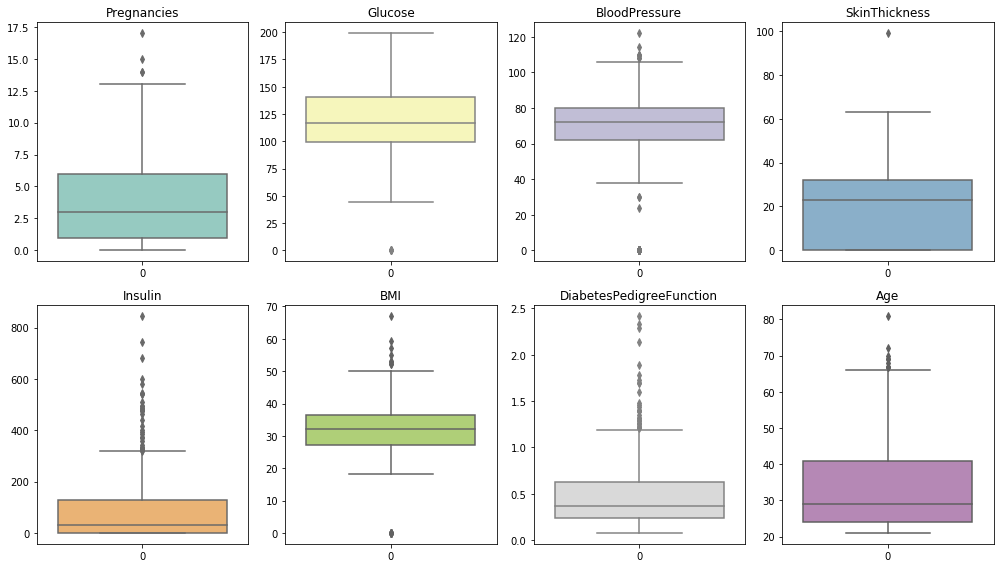

In [4]:
fig, axis = plt.subplots(2,4,figsize=(14,8))
axis = axis.ravel()
colors = plt.get_cmap('Set3',10).colors
for i,ax in enumerate(axis):
    sns.boxplot(data=diabData[diabCol[i]],color=colors[i],ax=ax)
    ax.set(title=diabCol[i])
plt.tight_layout()

* The Box-plots give us an idea about the outliers in the data. 
* We can see that for some attributes, the outliers are limited while for others they are many. 
* Chances are for the attributes such a Insulin and DiabetesPedigreeFunction, the main box might be misrepresenting data because of the invalid/missing values.
* For Skin Thickness and Glucose, the outliers are pretty evident.

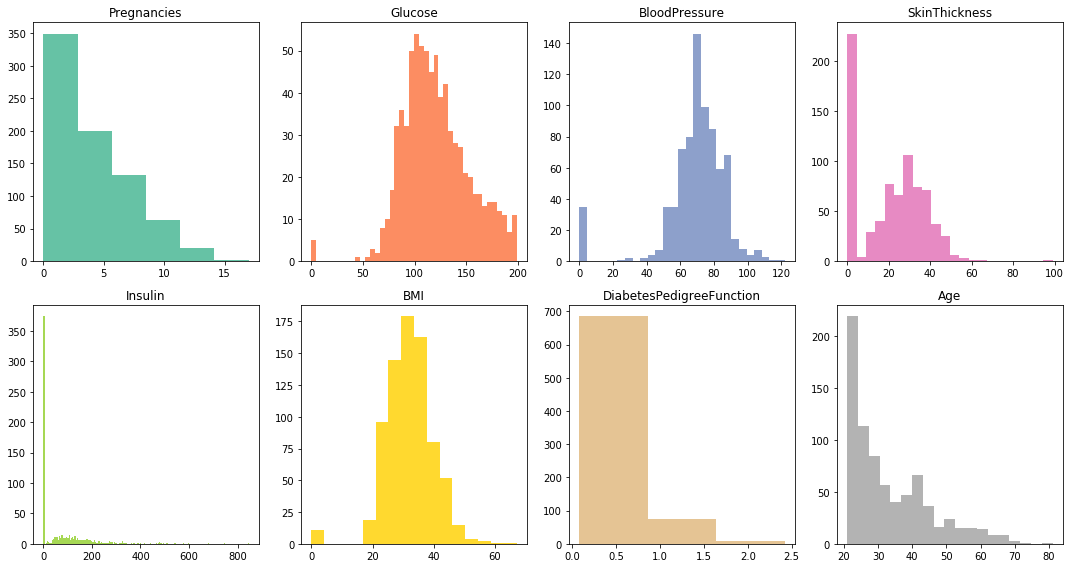

In [5]:
fig, axis = plt.subplots(2,4,figsize=(15,8))
axis = axis.ravel()
colors = plt.get_cmap('Set2',8).colors
for i,ax in enumerate(axis):
    ax.hist(diabData[diabCol[i]],bins=int(diabData[diabCol[i]].max()/5)+3,color=colors[i])
    ax.set(title=diabCol[i])
plt.tight_layout()

To extend the above analyses from boxplots, for Insulin, the data seems to be dominated by value zero and thus all other values are being shown as outliers in the boxplot. 

### 2.Find all positive correlations between all pairs of attributes.  Print these values and include in your report.

In [6]:
diabCorr = diabData.corr()
diabCorr.where(diabCorr>=0) #Since only positive values are asked for

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,NaN,NaN,0.017683,NaN,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,NaN,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,NaN,0.074752
Insulin,NaN,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,NaN,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,NaN,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,NaN,NaN,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 3.Plot the correlation heatmap for the entire dataset. Similar to (https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

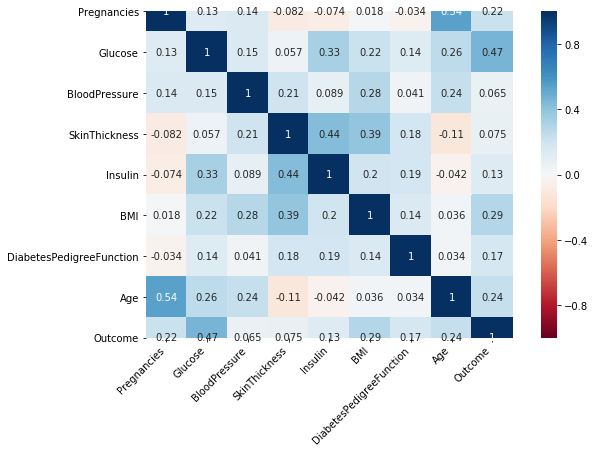

In [7]:
fig,ax = plt.subplots(1,figsize=(10,6))
sns.heatmap(diabCorr, vmin=-1, vmax=1, center=0, annot=True, cmap=plt.get_cmap('RdBu'), square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

### 4.Using a correlation coefficient of .3, show the scatter plots of all pairs of 2 variables which have a correlation above that threshold.  Include in the plots in your report.

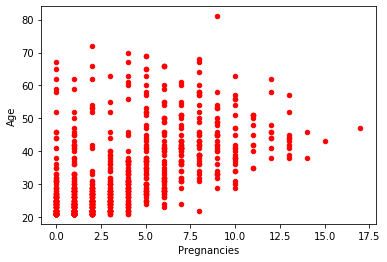

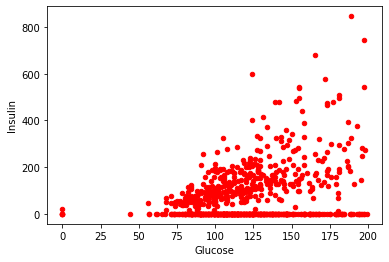

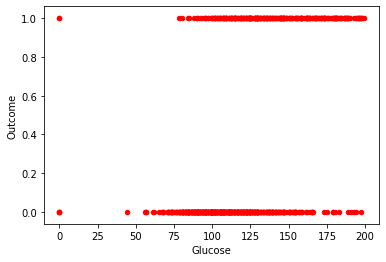

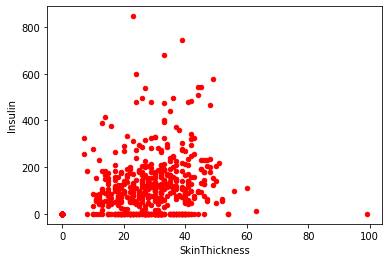

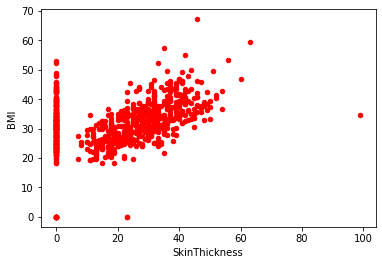

In [8]:
filterList = np.where(abs(diabCorr)>0.3)
for i in range(0,len(filterList[0])):
    if filterList[0][i]<filterList[1][i] :
        diabData.plot(fig=fig,kind='scatter',x=filterList[0][i],y=filterList[1][i],color='red')


### 5.Modify your plot for the previous question to assign 2 different colors for points in the plot belonging to the 2 target classes. Include these plots in your report.

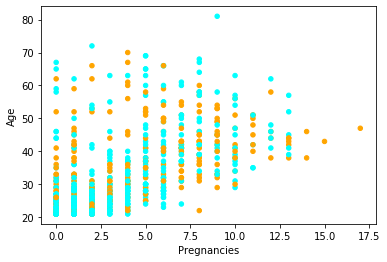

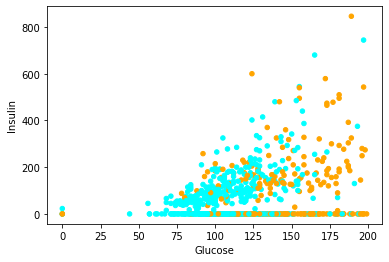

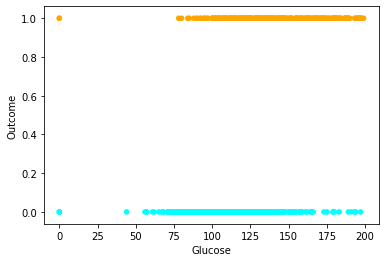

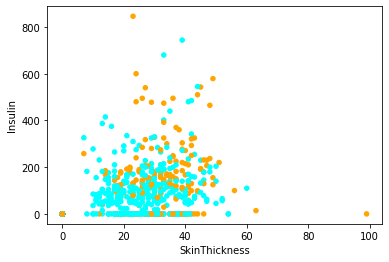

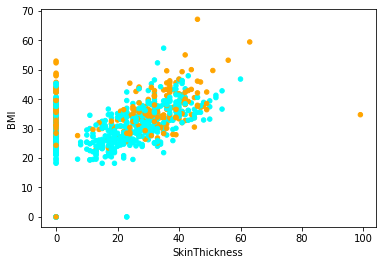

In [9]:
filterList = np.where(abs(diabCorr)>0.3)
for i in range(0,len(filterList[0])):
    if filterList[0][i]<filterList[1][i] :
        diabData.plot(fig=fig,kind='scatter',x=filterList[0][i],y=filterList[1][i],\
                  color=np.where(diabData['Outcome'],'orange','cyan'))


### 6.Split your dataset into train and test sets, using a split ratio of 80:20.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(diabData.iloc[:,0:8], diabData['Outcome'].values,\
                                                    test_size=0.2, random_state=0)

### 7.Use logistic Regression to predict the labels.  Show your results.

For Logistic Regression on Diabetes Data:
Accuracy: 0.8181818181818182
Model Score: 0.14257307615828196


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


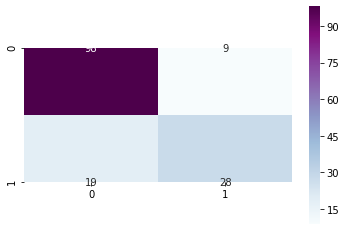

In [11]:
LogReg = LogisticRegression()#solver="lbfgs",multi_class='ovr')
LogModel = LogReg.fit(X_train,y_train)
y_pred = LogModel.predict(X_test)
print("For Logistic Regression on Diabetes Data:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Model Score:', metrics.r2_score(y_test, y_pred))  
confMat = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(confMat, annot=True, cmap=plt.get_cmap("BuPu"), square=True)
plt.show()

### 8.Use Naive Bayes to predict the labels. Show your results.  Which algorithm performed better?

For Naive Bayes on Diabetes Data:
Accuracy: 0.7922077922077922
Model Score: 0.020083515609465197


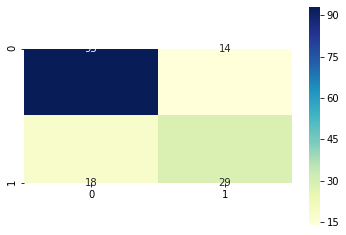

In [12]:
NBReg = GaussianNB()
NBModel = NBReg.fit(X_train,y_train)
y_pred = NBModel.predict(X_test)
print("For Naive Bayes on Diabetes Data:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Model Score:', metrics.r2_score(y_test, y_pred))  
confMat = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(confMat, annot=True, cmap=plt.get_cmap("YlGnBu"), square=True)
plt.show()

From the results of Logastic Regression and Naive Bayes, the accuracy of Logistic Regression is higher than the Naive Bayes. With some feature reduction/extraction performed, we might get different set of results but chances are that the Logistic Regression might still have higher accuracy.

### 9.Discretize all continuous valued attributes, using an appropriate binning technique, and a max number of bins=5 and min number of bins=2. Explain how and why you did this.(e.g. binning by means, boundaries, medians, widths, frequency).  Plot resulting histograms.

I am using 2 different techniques to Bin the data
* Equal Frequency Binning
* Binning based on the property of the data

For attributes - **Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age** - I am performing Equal Frequency binning, meaning for each bin the frequency should be same. This is implemented using the **qcut** function of pandas. In the below histograms, you might notice that for some bins the frequency is not same, this is because of the *duplicate values* present in the data.

For attributes - **BMI, Glucose, BloodPressure** - Binning is performed based on their properties for which the references are noted below. Based on the property, label to identify different values of the data is provided.

References:
* https://www.webmd.com/diabetes/how-sugar-affects-diabetes#1
* http://www.bloodpressureuk.org/BloodPressureandyou/Thebasics/Bloodpressurechart
* https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/

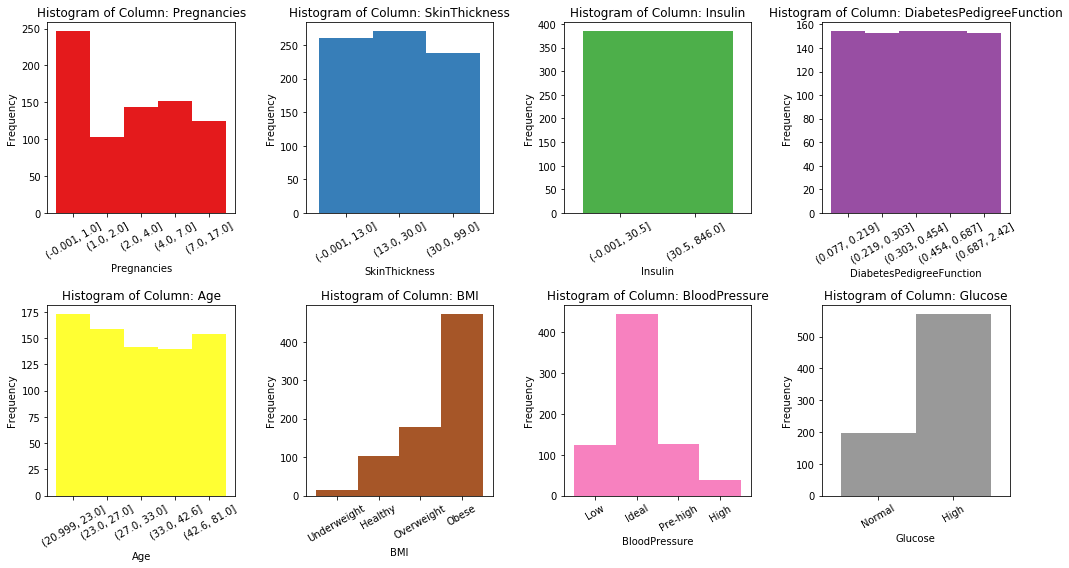

In [13]:
freqBins = [('Pregnancies',5), ('SkinThickness',3), ('Insulin',2), ('DiabetesPedigreeFunction',5), ('Age',5)]
fig, axis = plt.subplots(2,4,figsize=(15,8))
axis = axis.ravel()
colors = plt.get_cmap('Set1',8).colors
for i,ax in enumerate(axis):
    if i>4 : break
    BinsData = pd.qcut(diabData[freqBins[i][0]],freqBins[i][1]).value_counts()
    BinsData.sort_index().plot(kind='bar',color=colors[i],width=1,ax=ax)
    ax.set(title="Histogram of Column: "+freqBins[i][0],xlabel=freqBins[i][0],ylabel='Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

pd.cut(diabData['BMI'],bins=[0,18.5,25,30,70],right=False,labels=['Underweight','Healthy','Overweight','Obese']).\
    value_counts(sort=False).plot(kind='bar',color=colors[5],width=1,ax=axis[5])
axis[5].set(title="Histogram of Column: BMI",xlabel='BMI',ylabel='Frequency')
axis[5].set_xticklabels(axis[5].get_xticklabels(),rotation=30)

pd.cut(diabData['BloodPressure'],bins=[0,60,80,90,140],right=True,labels=['Low','Ideal','Pre-high','High']).\
    value_counts(sort=False).plot(kind='bar',color=colors[6],width=1,ax=axis[6])
axis[6].set(title="Histogram of Column: BloodPressure",xlabel='BloodPressure',ylabel='Frequency')
axis[6].set_xticklabels(axis[6].get_xticklabels(),rotation=30)

pd.cut(diabData['Glucose'],bins=[0,100,250],right=False,labels=['Normal','High']).\
    value_counts(sort=False).plot(kind='bar',color=colors[7],width=1,ax=axis[7])
axis[7].set(title="Histogram of Column: Glucose",xlabel='Glucose',ylabel='Frequency')
axis[7].set_xticklabels(axis[7].get_xticklabels(),rotation=30)

fig.tight_layout()

## Graduate Question

### 10.There are some values of “0” for blood pressure.  Use a suitable technique or algorithm to predict more appropriate values. Explain why you chose the technique and show results (i.e. what would the cumulative error be between predicted/fill-in values and the real values if you employed this technique for every value of blood pressure).  Do you think these updated values would have a meaningful impact on results of logistic regression?  Why or why not

The **0** values in Blood Pressure can be assumed to be missing values, since nobody can have zero blood pressure. To handle those values:
* I first replaced all the zeroes with NaN's, to look at the actual properties of data without zeroes weighing them down.
* I have tried multiple imputation methods such as Cold-deck imputation, hot-deck imputation and multiple interpolation techniques.
* While none of the methods actually helped in getting a better accuracy score on Logistic Regression, 
* Interpolation seems to be the better option because of the distribution of the data.
    * Blood Pressure has a good correlation with **BMI and Age**, from the correlation table.
    * Since BMI also has some missing values, We can use **Age** to sort the data and then apply polynomial interpolation which imputes data based on index of the missing values.

       BloodPressure       NewBP
count     768.000000  733.000000
mean       69.105469   72.405184
std        19.355807   12.382158
min         0.000000   24.000000
25%        62.000000   64.000000
50%        72.000000   72.000000
75%        80.000000   80.000000
max       122.000000  122.000000

Properties of Blood Pressure after filling the missing values :
count    768.000000
mean      72.329624
std       12.404617
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: NewBP, dtype: float64

For Logistic Regression on Diabetes Data with NewBP:
Accuracy: 0.7922077922077922
Model Score: 0.020083515609465197


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


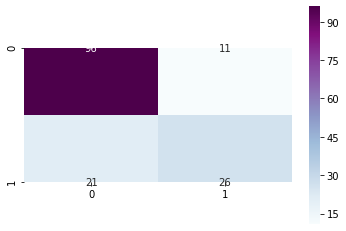

In [14]:
diabData['NewBP'] = diabData['BloodPressure'].where(diabData['BloodPressure']!=0,inplace=False)
print(diabData[['BloodPressure','NewBP']].describe())
diabData.sort_values(by=['Age'],inplace=True)
# diabData['NewBP'].fillna(method='backfill',inplace=True)
diabData['NewBP'].interpolate(method='polynomial', order=2, inplace=True)
print("\nProperties of Blood Pressure after filling the missing values :")
print(diabData['NewBP'].describe())
diabData.sort_index(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(diabData[['Pregnancies', 'Glucose', 'NewBP',\
                'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], diabData['Outcome'].values,\
                test_size=0.2, random_state=0)
LogReg = LogisticRegression()#solver='lbfgs', multi_class='auto')
LogModel = LogReg.fit(X_train,y_train)
y_pred = LogModel.predict(X_test)
print("\nFor Logistic Regression on Diabetes Data with NewBP:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Model Score:', metrics.r2_score(y_test, y_pred))  
confMat = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(confMat, annot=True, cmap=plt.get_cmap("BuPu"), square=True)
plt.show()

* Above we show the descriptive statistics of Blood Pressure and Blood Pressure without zeroes weighing it down.
* After that, we show descriptive statistics of Blood Pressure after the missing values are imputed through **Interpolation**
* We can see that the imputation did not change properties of the field much, thus giving us confidence that we preserved the natural destribution of the attribute.
* While the accuracy has actually decreased between the previous Logistic Regression and the Logistic Regression with the New Blood Pressure field, it's not much.
* The ineffect of imputation might be because of the relationship shared by Blood Pressure and the target variable - Outcome.
* In the graph below as we can see, for both the classes of Outcome **0,1** - the data of blood pressure is simularily distributed meaning that it doesn't effect the classification very much. The correlation values between these 2 fields from the above Correlation heatmap, serves to prove that point.

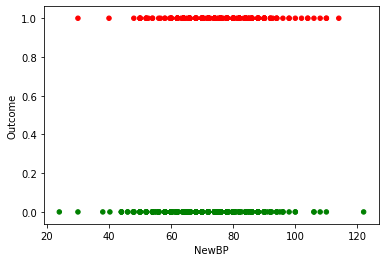

In [15]:
diabData.plot(fig=fig,kind='scatter',x='NewBP',y='Outcome',\
                  color=np.where(diabData['Outcome'],'red','green'))
